<a href="https://colab.research.google.com/github/WondahX/BMI707/blob/main/BMI707_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


Mounted at /content/drive


**Proposal for the EPI 290/BMI 707 course project**


**Prediction of leukocyte telomere length by persistent organic pollutants**

Group 4
Fuyu Guo	Yiwen Rao	Kailin Xu	Nick Ma

Exposure to persistent organic pollutants (POPs) such as dioxins, furans, and polychlorinated biphenyls (PCBs) may influence leukocyte telomere length (LTL),1 a biomarker associated with chronic disease. In vitro research suggests dioxins may bind to the aryl hydrocarbon receptor (AhR) and induce telomerase activity,2 which elongates LTL. In this project, we aim to use persistent organic pollutant exposures as well as other demographic features to predict the length of LTL among 1003 U.S. adults.

We will use data from the National health and Nutrition Examination Survey (NHANES) 2001 to 2002. In addition to the length of LTL, it contains:
11 PCB exposures, namely PCB 74, 99, 118, 138, 153, 170, 180, 187, 194;
3 Dixoin exposures, namely Dioxin 1, 2, 3;
4 Furan exposures, namely Furan 1, 2, 3;
6 blood biomarkers, including white blood cell count, lymphocyte percent, monocyte percent, eosinophils percent, basephiles percent, and segmented neutrophils percent;
1 biomarker for conitine;
5 demographic features, including sex, age at screening, race/ethnicity, body mass index (BMI), and education level.

We aim to use neural networks to solve this regression problem. We will trymore advanced neural network models in the project with the progression of the class.

References
[1] Mitro, S. D., Birnbaum, L. S., Needham, B. L., & Zota, A. R. (2016). Cross-sectional associations between exposure to persistent organic pollutants and leukocyte telomere length among US adults in NHANES, 2001–2002. Environmental health perspectives, 124(5), 651-658.
[2] Casati, L. G. M. S. S., Catalani, I. Z. M. D. P., & Marafante, E. (1998). Modulation of proto-oncogene expression by polychlorinated biphenyls in 3T3-L1 cell line. Journal of Toxicology and Environmental Health Part A, 55(2), 121-131.



## Read in data

In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/BMI707 EPI290_Project/trainData.csv')

test_data = pd.read_csv('/content/drive/MyDrive/BMI707 EPI290_Project/testData.csv')
print(train_data.shape)
print(test_data.shape)

(702, 36)
(301, 36)


In [6]:
X_train = train_data.loc[:,train_data.columns != "lnLTL"]
Y_train = train_data['lnLTL']

X_test = test_data.loc[:,train_data.columns != "lnLTL"]
Y_test = test_data['lnLTL']

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.activations

In [21]:
N_EPOCHS = 100
Batch_size = np.floor(train_data.shape[0]/10)
Batch_size = int(Batch_size)

In [12]:
model = Sequential()
number_features = X_train.shape[1]
model.add(Dense(units = 32, activation = 'relu', input_dim = number_features, name = 'hidden_layer'))
model.add(Dense(units = 1, activation = 'linear', name = 'output_layer'))
adma = Adam( learning_rate=0.001)
model.compile(optimizer="adam", loss = 'mean_squared_error')

model_fit = model.fit(x = X_train,
                      y = Y_train,
                      batch_size = Batch_size,
                      epochs = N_EPOCHS,
                      validation_data= (X_test, Y_test))



Epoch 1/100
11/11 [==============================] - 1s 34ms/step - loss: 8.4021 - val_loss: 4.1478
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 3.4852 - val_loss: 2.2131
Epoch 3/100
11/11 [==============================] - 0s 13ms/step - loss: 2.0966 - val_loss: 1.8512
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 1.6886 - val_loss: 1.7050
Epoch 5/100
11/11 [==============================] - 0s 20ms/step - loss: 1.5010 - val_loss: 1.5436
Epoch 6/100
11/11 [==============================] - 0s 34ms/step - loss: 1.3315 - val_loss: 1.3883
Epoch 7/100
11/11 [==============================] - 0s 39ms/step - loss: 1.2169 - val_loss: 1.2778
Epoch 8/100
11/11 [==============================] - 0s 29ms/step - loss: 1.1453 - val_loss: 1.2091
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 1.0885 - val_loss: 1.1684
Epoch 10/100
11/11 [==============================] - 0s 9ms/step - loss: 1.0390 - val_loss: 1.1483


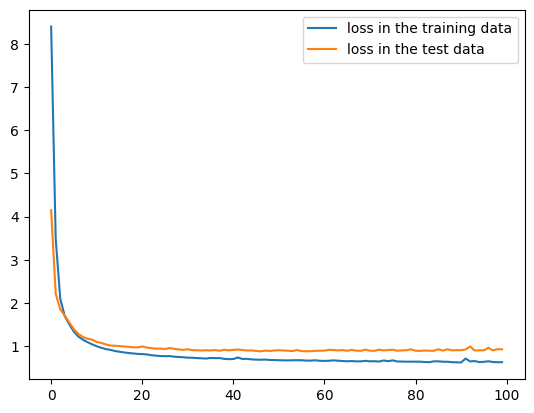

In [14]:
plt.plot(model_fit.history['loss'], label='loss in the training data')
plt.plot(model_fit.history['val_loss'], label = 'loss in the test data')
plt.legend()
plt.savefig('/content/drive/MyDrive/BMI707 EPI290_Project/trace_curve_MLP_0420.png')

In [ ]:
Y_test

0     -1.519608
1     -0.633938
2     -0.894164
3     -0.701467
4     -0.259646
         ...   
296    1.062848
297    0.674048
298    0.254414
299   -0.494072
300   -1.061914
Name: lnLTL, Length: 301, dtype: float64

## Simple linear regression


In [16]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression().fit(X_train, Y_train)
Y_test_predict = model_lin.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_test_predict)

0.8463993921856553

## Lasso

In [17]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(cv = 10).fit(X_train, Y_train)
Y_test_predict = model_lasso.predict(X_test)
mean_squared_error(Y_test,Y_test_predict)


0.8184916175771791

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000,
                           max_depth=3, random_state=1,
                           max_features = None).fit(X_train, Y_train)
Y_test_predict = rf.predict(X_test)
mean_squared_error(Y_test,Y_test_predict)


0.8522568843699405

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_)

KeyboardInterrupt: ignored

## Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.001, max_depth=1, random_state=0).fit(X_train, Y_train)
Y_test_predict = boosting.predict(X_test)
mean_squared_error(Y_test,Y_test_predict)



0.8578491060014112